In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
data=pd.read_csv('drive/MyDrive/Colab Notebooks/機器學習周信宏/第8章/boston_housing.csv')

unuse=['zn', 'nox', 'rm', 'age', 'ptratio', 'black']
data=data.drop(unuse, axis=1)

#訓練資料和label把它分出來
y=data.pop('medv').values.astype('float32')  #需要我們預測的值(房價的中位數)
x=data.values.astype('float32')   

In [17]:
x

array([[6.3200e-03, 2.3100e+00, 0.0000e+00, ..., 1.0000e+00, 2.9600e+02,
        4.9800e+00],
       [2.7310e-02, 7.0700e+00, 0.0000e+00, ..., 2.0000e+00, 2.4200e+02,
        9.1400e+00],
       [2.7290e-02, 7.0700e+00, 0.0000e+00, ..., 2.0000e+00, 2.4200e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 1.1930e+01, 0.0000e+00, ..., 1.0000e+00, 2.7300e+02,
        5.6400e+00],
       [1.0959e-01, 1.1930e+01, 0.0000e+00, ..., 1.0000e+00, 2.7300e+02,
        6.4800e+00],
       [4.7410e-02, 1.1930e+01, 0.0000e+00, ..., 1.0000e+00, 2.7300e+02,
        7.8800e+00]], dtype=float32)

In [3]:
#轉成np.array的資料型態
import random
import numpy as np
xy=list(zip(x,y))
random.shuffle(xy)
x,y=zip(*xy)
x=np.array(x)
y=np.array(y)


In [18]:
x

array([[6.3200e-03, 2.3100e+00, 0.0000e+00, ..., 1.0000e+00, 2.9600e+02,
        4.9800e+00],
       [2.7310e-02, 7.0700e+00, 0.0000e+00, ..., 2.0000e+00, 2.4200e+02,
        9.1400e+00],
       [2.7290e-02, 7.0700e+00, 0.0000e+00, ..., 2.0000e+00, 2.4200e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 1.1930e+01, 0.0000e+00, ..., 1.0000e+00, 2.7300e+02,
        5.6400e+00],
       [1.0959e-01, 1.1930e+01, 0.0000e+00, ..., 1.0000e+00, 2.7300e+02,
        6.4800e+00],
       [4.7410e-02, 1.1930e+01, 0.0000e+00, ..., 1.0000e+00, 2.7300e+02,
        7.8800e+00]], dtype=float32)

In [20]:
#切割測試和訓練資料
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 用train的mean和std標準化每個欄位: 把值變成0-1
x_mean=np.mean(x_train, axis=0)
x_std=np.std(x_train, axis=0)
y_mean=np.mean(y_train, axis=0)
y_std=np.std(y_train, axis=0)

x_train=(x_train-x_mean)/x_std
x_test=(x_test-x_mean)/x_std
y_train=(y_train-y_mean)/y_std
y_test=(y_test-y_mean)/y_std


In [5]:
# 用train的min和max正規化
x_min=np.min(x_train, axis=0)
x_max=np.max(x_train, axis=0)
y_min=np.min(y_train, axis=0)
y_max=np.max(y_train, axis=0)
x_train=(x_train-x_min)/(x_max-x_min)
x_test=(x_test-x_min)/(x_max-x_min)
y_train=(y_train-y_min)/(y_max-y_min)
y_test=(y_test-y_min)/(y_max-y_min)


In [21]:
x_train.shape

(404, 7)

In [6]:
# 因為之後嘗試使用1D捲積，所以需要reshape
x_train=x_train.reshape(x_train.shape+(1,))
x_test=x_test.reshape(x_test.shape+(1,))
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 7, 1) (404,)
(102, 7, 1) (102,)


In [9]:
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from tensorflow.keras.models import Sequential

In [10]:
model=Sequential()
model.add(Conv1D(
        32, 
        kernel_size=2, 
        padding='same', 
        activation='relu', 
        input_shape=(7, 1)))
model.add(Dropout(rate=0.3))
model.add(Conv1D(
        32, 
        kernel_size=2, 
        padding='same', 
        activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation='linear'))  #因為最後要預測房價，只會輸出一個數字Dense(1)


In [11]:
# y_true, y_pred為tensor物件
import tensorflow.keras.backend as K

#自訂loss function: 均方根誤差
def rmse(y_true, y_pred):  
        return K.sqrt(K.mean(K.square(y_pred - y_true)))  #誤差平方後再取平均

model.compile(
        loss=rmse,
        optimizer='rmsprop')
history=model.fit(
        x_train,y_train,
        validation_data=(x_test,y_test),
        epochs=60)


Epoch 1/60
13/13 [==============================] - 4s 122ms/step - loss: 0.4060 - val_loss: 0.1998
Epoch 2/60
13/13 [==============================] - 1s 93ms/step - loss: 0.1924 - val_loss: 0.1638
Epoch 3/60
13/13 [==============================] - 1s 95ms/step - loss: 0.1897 - val_loss: 0.2403
Epoch 4/60
13/13 [==============================] - 1s 60ms/step - loss: 0.1749 - val_loss: 0.2370
Epoch 5/60
13/13 [==============================] - 1s 61ms/step - loss: 0.1654 - val_loss: 0.2144
Epoch 6/60
13/13 [==============================] - 1s 60ms/step - loss: 0.1527 - val_loss: 0.1276
Epoch 7/60
13/13 [==============================] - 1s 62ms/step - loss: 0.1519 - val_loss: 0.1784
Epoch 8/60
13/13 [==============================] - 1s 62ms/step - loss: 0.1530 - val_loss: 0.1491
Epoch 9/60
13/13 [==============================] - 1s 71ms/step - loss: 0.1360 - val_loss: 0.1371
Epoch 10/60
13/13 [==============================] - 1s 84ms/step - loss: 0.1412 - val_loss: 0.1221
Epoch 11

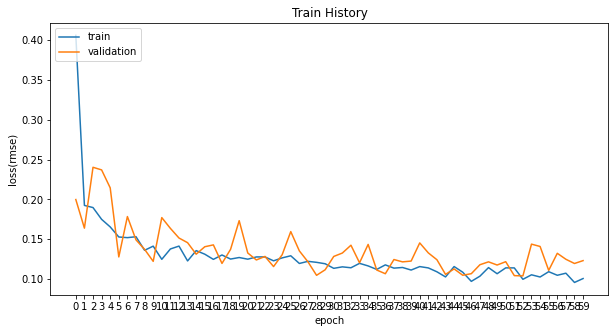

In [12]:
#因為房價沒辦法跟之前的分類一樣可以預測的完全正確(價格很難剛好一樣)，很難用accurancy去看，因此我們定義loss去看根實際房價差了多少
import matplotlib.pyplot as plt
def show_train_history(train_history):
    plt.figure(figsize=(10,5))
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.xticks([i for i in range(len(train_history.history['loss']))])
    plt.title('Train History')
    plt.ylabel('loss(rmse)')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(history)



In [22]:
# 將預測值復原回正規化、標準化前
def inverse(y):
    inverse_y=y*(y_max-y_min)+y_min
    inverse_y=inverse_y*y_std+y_mean
    inverse_y[np.where(inverse_y<0)]=0
    return inverse_y
y_true=inverse(y_test)
y_pred=model.predict(x_test).ravel()
y_pred=inverse(y_pred)


ValueError: ignored

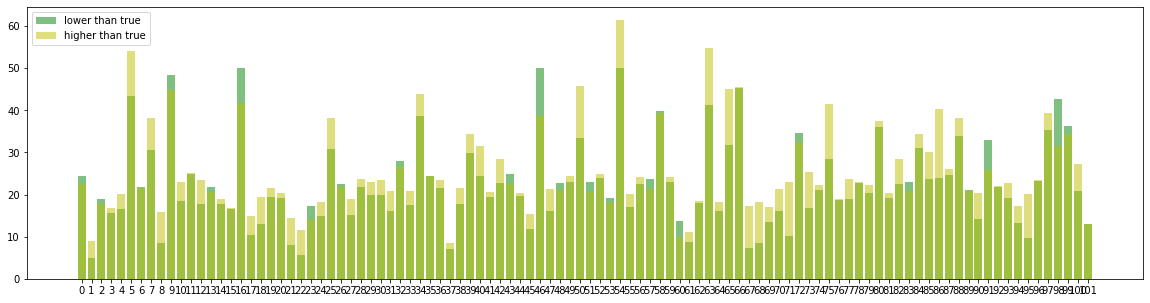

rmse:  5.6093884


In [13]:
#利用長條圖呈現
plt.figure(figsize=(20,5))
plt.bar([i for i in range(len(y_true))], y_true, alpha=0.5, color='g')
plt.bar([i for i in range(len(y_pred))], y_pred, alpha=0.5, color='y')
plt.xticks([i for i in range(len(y_true))])
plt.legend(['lower than true', 'higher than true'], loc='upper left')
plt.show()



In [14]:
#顯示預測差異
from sklearn.metrics import mean_squared_error
print('rmse: ', np.sqrt(mean_squared_error(y_true,y_pred)))

rmse:  5.6093884
